In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

**1. TENSORFLOW**

In [2]:
import tensorflow as tf
print("The vesion of tensorflow is",tf.__version__)

import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# from tensorflow.examples.tutorials.mnist import input_data
# import input_data

The vesion of tensorflow is 2.3.0
Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
type(x1)
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)
print(result)
type(result)
tf.print(result)

# Intialize the Session
sess = tf.compat.v1.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

tensorflow.python.framework.ops.Tensor

Tensor("Mul:0", shape=(4,), dtype=int32)


tensorflow.python.framework.ops.Tensor

<tf.Operation 'PrintV2' type=PrintV2>

[ 5 12 21 32]


In [4]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)
tf.print(result)

# Initialize Session and run `result`
with tf.compat.v1.Session() as sess:
    output = sess.run(result)
    print(output)

<tf.Operation 'PrintV2_1' type=PrintV2>

[ 5 12 21 32]


In [5]:
# Creating nodes in computation graph 
node1 = tf.constant(3, dtype=tf.int32) 
node2 = tf.constant(5, dtype=tf.int32) 
node3 = tf.add(node1, node2)

In [6]:
# Create a TensorFlow constant
const = tf.constant(2.0, name="const")
    
# Create TensorFlow variables
b = tf.Variable(2.0, name='b')
c = tf.Variable(1.0, name='c')

In [7]:
# Tensorflow operations
d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

In [8]:
# setup the variable initialisation
init_op = tf.global_variables_initializer()

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    # compute the output of the graph
    a_out = sess.run(a)
    print("Variable a is {}".format(a_out))

Variable a is 9.0


In [9]:
# Create TensorFlow variable
b = tf.placeholder(tf.float32, [None, 1], name='b')
# a_out = sess.run(a, feed_dict={b: np.arange(0, 10)[:, np.newaxis]})

In [27]:
# Loading the data from  tensorflow
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [11]:
# Checking the properties of the loaded data
type(train_images), type(train_labels)
train_images.shape, train_labels.shape

(numpy.ndarray, numpy.ndarray)

((60000, 28, 28), (60000,))

In [12]:
# Setting up optimisation variables
learning_rate = 0.5
epochs = 10
batch_size = 100

In [13]:
# Declare the training data placeholders. Input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])

# Declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

In [14]:
# Declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')

# Weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

In [15]:
# Calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

In [16]:
# Calculate the hidden layer output - in this case, let's use a softmax activated
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))

In [17]:
# Adding an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

In [18]:
# Finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# Define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**2. SCIKIT LEARN**

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Define the columns to be used
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_week', 'native_country', 'label']

# Define continuous list
CONTI_FEATURES  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_week']

# Define categorical list
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Prepare the data
features = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex',
            'capital_gain', 'capital_loss', 'hours_week', 'native_country']

In [4]:
# Reading the path for the data
PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Reading the data from the above path
df_train = pd.read_csv(PATH, skipinitialspace=True, names = COLUMNS, index_col=False)
df_train[CONTI_FEATURES] =df_train[CONTI_FEATURES].astype('float64')
df_train.shape
df_train.info()

(32561, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital         32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_week      32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  label           32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Check the count of unique values of the native_country features
df_train.native_country.value_counts().head(6)

# Drop Netherland, because only one row
df_train = df_train[df_train.native_country != "Holand-Netherlands"]

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Name: native_country, dtype: int64

In [6]:
# Will loop over all columns names in CONTI_FEATURES and get its index and then append it to a list called conti_features
conti_features = []

for i in CONTI_FEATURES:
    position = df_train.columns.get_loc(i)
    conti_features.append(position)
    
print(conti_features)

[0, 2, 10, 4, 11, 12]


In [7]:
# Get the column index of the categorical features
categorical_features = []

for i in CATE_FEATURES:
    position = df_train.columns.get_loc(i)
    categorical_features.append(position)
    
print(categorical_features)
print("==================================================================")

print(df_train[CATE_FEATURES].nunique(), 'There are',sum(df_train[CATE_FEATURES].nunique()), 'groups in the whole dataset')
print("==================================================================")

# for i in CATE_FEATURES:
#     print(df_train[i].unique())

[1, 3, 5, 6, 7, 8, 9, 13]
workclass          9
education         16
marital            7
occupation        15
relationship       6
race               5
sex                2
native_country    41
dtype: int64 There are 101 groups in the whole dataset


Therefore, the training dataset will contain 101 + 7 columns. The last seven columns are the continuous features.

Scikit-learn can take care of the conversion. It is done in two steps:

- First, you need to convert the string to ID. For instance, State-gov will have the ID 1, Self-emp-not-inc ID 2 and so on. The function LabelEncoder does this for you
- Transpose each ID into a new column. The dataset has 101 group's ID. Therefore there will be 101 columns capturing all categoricals features' groups. Scikit-learn has a function called OneHotEncoder that performs this operation

In [8]:
# Create the train/test set
# Now that the dataset is ready, we can split it 80/20. 80 percent for the training set and 20 percent for the test set

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train.label, test_size = 0.2, random_state=113)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26048, 14) (26048,)
(6512, 14) (6512,)


- The pipeline makes it easier to feed the model with consistent data
- The idea behind is to put the raw data into a 'pipeline' to perform operations
- For instance, with the current dataset, you need to standardize the continuous variables and convert the categorical data
- Note that you can perform any operation inside the pipeline
- For instance, if you have 'NA's' in the dataset, you can replace them by the mean or medianm
- You can also create new variables

In [9]:
# Build the pipeline
# The object OneHotEncoder inside make_column_transformer automatically encodes the label
preprocess = make_column_transformer((StandardScaler(), make_column_selector(dtype_include = np.number)),
                                     (OneHotEncoder(), make_column_selector(dtype_include = object)))
# type(preprocess)

# You can test if the pipeline works with fit_transform. The dataset should have the following shape: 26048, 107
preprocess.fit_transform(X_train).shape
type(preprocess)

# Create the pipeline with make_pipeline. Once the data are transformed, you can feed the logistic regression.
model = make_pipeline(preprocess, LogisticRegression(solver='liblinear', random_state=0))
type(model)

(26048, 107)

sklearn.compose._column_transformer.ColumnTransformer

sklearn.pipeline.Pipeline

In [10]:
# model.named_steps
# model.classes_
# model.set_params

In [11]:
# Once we fit the model, we can check a lot of things
# print("Classes present in the model are:", model.classes_)
# print("The intercept of the model is ", model.intercept_)
# print("The model co-efficient is ", model.coef_)

In [12]:
# Fit the model pipeline on the training data
model.fit(X_train, y_train)

# lets evaluate our model on the test data
model.predict_proba(X_test)

# The above command predicts the probability, but we require the output in the form of classes
model.predict(X_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020AE1CC7430>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020AE1C24CD0>)])),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

array([[9.50153003e-01, 4.98469975e-02],
       [8.54606951e-01, 1.45393049e-01],
       [9.99594321e-01, 4.05679239e-04],
       ...,
       [3.40911194e-01, 6.59088806e-01],
       [2.96496479e-01, 7.03503521e-01],
       [6.25576647e-01, 3.74423353e-01]])

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [13]:
# Lets check the performance of the model on the test data by calculating the mdoel accuracy
print("logistic regression score: %f" % model.score(X_test, y_test))

logistic regression score: 0.848280


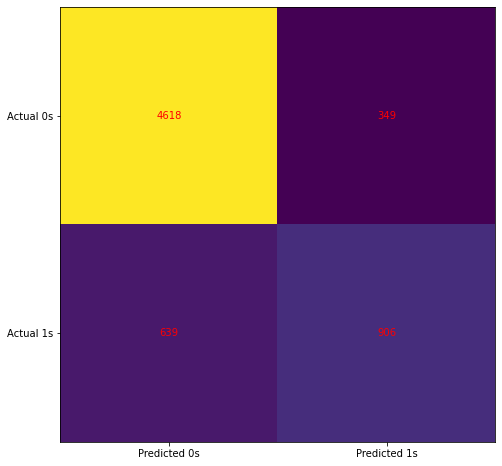

In [14]:
# Lets build the classification heatmap
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show();

In [15]:
# Classification report gives us other model parameters which coudl be useful
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4967
        >50K       0.72      0.59      0.65      1545

    accuracy                           0.85      6512
   macro avg       0.80      0.76      0.78      6512
weighted avg       0.84      0.85      0.84      6512



In [20]:
# Improving the model performance

# logistic = LogisticRegression(max_iter=10000, tol=0.1)
# pipe = Pipeline(steps=[('logistic', logistic),('transformation', trans)])
# type(pipe)

# param_grid = {'logistic__C': [0.001, 0.01,0.1, 1.0]}
param_grid = {'logisticregression__C':[.01,.05,.1,.5,1,5,10],
              'logisticregression__penalty':['l1','l2']}

search = GridSearchCV(estimator=model, cv=7, n_jobs=-1, param_grid=param_grid ,scoring='roc_auc')

search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020AE1CC7430>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020AE1C24CD0>)])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
         

In [21]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.909):
{'logisticregression__C': 0.5, 'logisticregression__penalty': 'l2'}


In [22]:
# sorted(model.get_params().keys())
# sorted(pipe.get_params().keys())

**3. NUMPY**

Refer [this URL](http://localhost:8888/notebooks/Python_work/Edureka/Webinar_Data%20Analysis%20with%20Python_NumPy.ipynb)

**4. THEANO**

- It is a Python library that allows us to evaluate mathematical operations including multi-dimensional arrays efficiently
- It is mostly used in building Deep Learning Projects
- It works a way more faster on Graphics Processing Unit (GPU) rather than on CPU
- Theano attains high speeds that gives a tough competition to C implementations for problems involving large amounts of data - - It can take advantage of GPUs which makes it perform better than C on a CPU by considerable orders of magnitude under some certain circumstances
- It knows how to take structures and convert them into very efficient code that uses numpy and some native libraries
- It is mainly designed to handle the types of computation required for large neural network algorithms used in Deep Learning 

In [12]:
# !pip install theano   # for the first time only
import theano
import numpy
import theano.tensor as T
# T.__version__
from theano import tensor
from theano import function

In [10]:
# Subtracting two scalars
  
# Declaring variables 
a = tensor.dscalar() 
b = tensor.dscalar() 
  
# Subtracting  
res = a - b

# Converting it to a callable object so that it takes matrix as parameters 
func = theano.function([a, b], res) 
  
# Calling function 
assert 20.0 == func(30.5, 10.5)

In [13]:
# Adding two scalars

# Declaring two variables 
x = T.dscalar('x') 
y = T.dscalar('y') 
  
# Summing up the two numbers 
z = x + y 
  
# Converting it to a callable object so that it takes matrix as parameters 
f = function([x, y], z) 
f(5, 7)

array(12.)

In [14]:
# Adding two matrices

x = T.dmatrix('x') 
y = T.dmatrix('y') 
z = x + y 
f = function([x, y], z) 
  
f([[30, 50], [2, 3]], [[60, 70], [3, 4]])

array([[ 90., 120.],
       [  5.,   7.]])

In [15]:
# Logistic function

# Declaring variable 
a = tensor.dmatrix('a') 
  
# Sigmoid function 
sig = 1 / (1 + tensor.exp(-a)) 
  
# Now it takes matrix as parameters 
log = theano.function([a], sig) 
  
# Calling function 
print(log([[0, 1], [-1, -2]])) 

[[0.5        0.73105858]
 [0.26894142 0.11920292]]


**5. KERAS**

In [36]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense


In [24]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

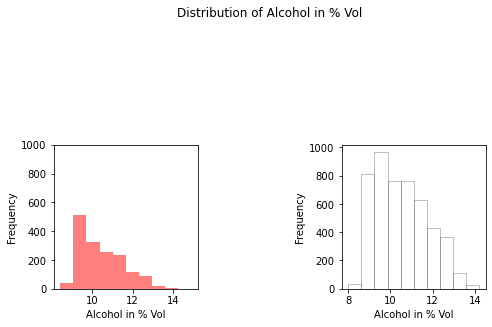

In [25]:
# Plotting the data

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])

ax[0].set_xlabel("Alcohol in % Vol"), ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol"), ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best'), ax[1].legend(loc='best')

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show();

(array([  0,   7, 673, 452, 305, 133,  21,   8], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


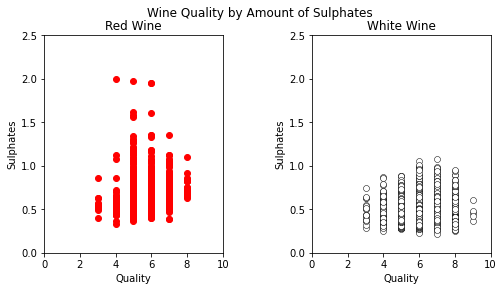

In [26]:
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine"), ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality"), ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates"), ax[1].set_ylabel("Sulphates")

ax[0].set_xlim([0,10]), ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5]), ax[1].set_ylim([0,2.5])

fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")
plt.show();

In [30]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

# Checking the wine data
wines.shape
wines.columns

(6497, 13)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

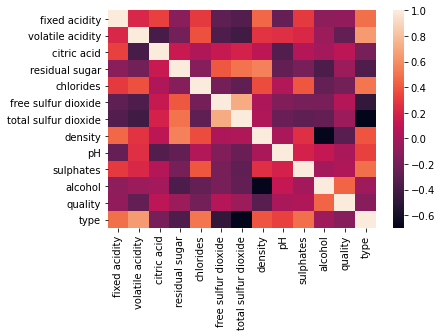

In [32]:
# Building the correlation plot
corr = wines.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [33]:
# Split the data into train and test for bilding the model

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
# Scaling the train data before building the model

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [37]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model output shape
model.output_shape

(None, 1)

In [38]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Model config
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initial

In [40]:
# List all weight tensors 
model.get_weights()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# Fit the model on the training data
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

# Making predictions on the test data
y_pred = model.predict(X_test)

[array([[ 0.29016548, -0.06281367,  0.2650705 , -0.2923745 , -0.45035696,
         -0.2864384 ,  0.11512917, -0.30374503, -0.19064304, -0.12088829,
         -0.13426557, -0.31410855],
        [ 0.3614815 ,  0.49321753, -0.19466534, -0.30637646,  0.26940888,
          0.29136312,  0.28913504, -0.08297482, -0.20300168, -0.0232397 ,
         -0.40711397, -0.08965847],
        [ 0.26455063, -0.06002203,  0.01317978,  0.28367168,  0.48099196,
          0.15836191, -0.30199772,  0.3124137 , -0.28945228, -0.05696699,
          0.30922097, -0.09879243],
        [-0.09902465,  0.02367467,  0.34282184,  0.35645324, -0.13367596,
         -0.14044008,  0.04219842, -0.3599372 , -0.21708402, -0.20135933,
         -0.03553173,  0.3748371 ],
        [ 0.06599534,  0.08808744,  0.37462848,  0.33912957, -0.10308117,
         -0.28603506, -0.31528172,  0.35491097,  0.48667037, -0.33576214,
         -0.31792372,  0.17254281],
        [ 0.16791362, -0.4989882 ,  0.50980705,  0.3572997 , -0.23957554,
      

Epoch 1/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.1006 - accuracy: 0.9665
Epoch 2/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0273 - accuracy: 0.9945
Epoch 3/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0217 - accuracy: 0.9954
Epoch 4/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0194 - accuracy: 0.9961
Epoch 5/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0178 - accuracy: 0.9966
Epoch 6/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0163 - accuracy: 0.9963
Epoch 7/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0163 - accuracy: 0.9968
Epoch 8/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0142 - accuracy: 0.9972
Epoch 9/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0127 - accuracy: 0.9975
Epoch 10/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.014

In [41]:
# Checking the prediction made by the model
y_test[:5]

# Scoring the prediction by conparing with the y_test data
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

array([0, 1, 0, 0, 0], dtype=int64)

68/68 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9944
[0.029724877327680588, 0.9944055676460266]


**6. NLTK**

[Article1](https://likegeeks.com/nlp-tutorial-using-python-nltk/)

In [71]:
# !pip install nltk    # for the first time only
import nltk
print("The vesion of tensorflow is", nltk.__version__)

from nltk.tag import pos_tag_sents
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from nltk.corpus import wordnet

import urllib.request

The vesion of tensorflow is 3.5


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenize text in Python**

In [59]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [60]:
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)

print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

**Let’s convert that text into tokens by splitting the text**

In [62]:
tokens = [t for t in text.split()]
print(tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

**Count word frequency**

In [63]:
freq = nltk.FreqDist(tokens)

for key,val in freq.items():
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:43
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:3
CGI:1
binaryInstalled:1
an:12
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAff

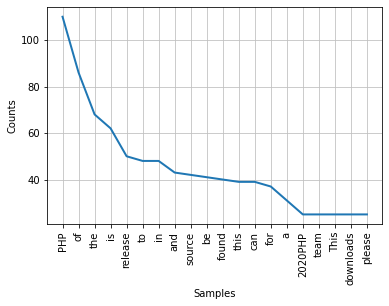

In [64]:
# Plot a graph for those tokens using plot function
freq.plot(20, cumulative=False)

In [66]:
# Remove stop words using NLTK
# NLTK comes with stop words lists for most languages. Lets get English stop words

print(stopwords.words('english'), end='')

# We can add or remove stopwords from the above list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
# Let’s modify our code and clean the tokens before plotting the graph
# We will make a copy of the list and then we will iterate over the tokens and remove the stop words

clean_tokens = tokens[:]
sr = stopwords.words('english')

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

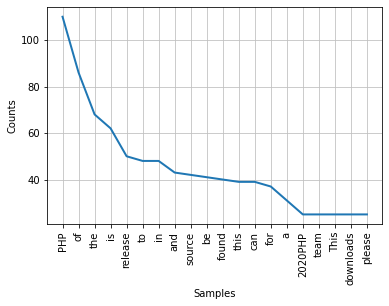

In [68]:
# Lets re-do the frequency plot
freq.plot(20,cumulative=False)

**Tokenization using NLTK**

In [70]:
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(sent_tokenize(mytext))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [72]:
# Lets use work tokenizer this time to see the results
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


**WORDNET**

In [73]:
# Lets find the definition and examples of an English word
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [74]:
# Can use WordNet to get synonymous words
synonyms = []

for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())

print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


In [75]:
# Get antonyms
antonyms = []

for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(antonyms)

['large', 'big', 'big']


**`The goal of this activity will be to count how many adjectives and nouns appear in the positive subset of the twitter_samples corpus`**

In [ ]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [53]:
twitter_samples.fileids()
tweets = twitter_samples.strings('positive_tweets.json')

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

- When we first load our list of tweets, each tweet is represented as one string
- Before we can determine which words in our tweets are adjectives or nouns, we first need to tokenize our tweets
- Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements, which are called tokens

In [54]:
# This new variable, tweets_tokens, is a list where each element in the list is a list of tokens
# Now that we have the tokens of each tweet we can tag the tokens with the appropriate POS tags
tweets_tokens = twitter_samples.tokenized('positive_tweets.json')

In [56]:
# NLTK allows us to tag each of our tokens using pos tagger
tweets_tagged = pos_tag_sents(tweets_tokens)
tweets_tagged[0]

[('#FollowFriday', 'JJ'),
 ('@France_Inte', 'NNP'),
 ('@PKuchly57', 'NNP'),
 ('@Milipol_Paris', 'NNP'),
 ('for', 'IN'),
 ('being', 'VBG'),
 ('top', 'JJ'),
 ('engaged', 'VBN'),
 ('members', 'NNS'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('community', 'NN'),
 ('this', 'DT'),
 ('week', 'NN'),
 (':)', 'NN')]

- We can see that our tweet is represented as a list and for each token we have information about its POS tag
- Each token/tag pair is saved as a tuple
- In NLTK, the abbreviation for adjective is JJ
- The NLTK tagger marks singular nouns (NN) with different tags than plural nouns (NNS)
- To simplify, we will only count singular nouns by keeping track of the NN tag

In [58]:
# We will keep track of how many times JJ and NN appear using an accumulator (count) variable
JJ_count = 0
NN_count = 0

for tweet in tweets_tagged:
    for pair in tweet:
        tag = pair[1]
        if tag == 'JJ':
            JJ_count += 1
        elif tag == 'NN':
            NN_count += 1


print('Total number of adjectives = ', JJ_count)
print('Total number of nouns = ', NN_count)

Total number of adjectives =  6092
Total number of nouns =  13181
